# Pandas 

>80% of data analysis is spent on the process of cleaning and preparing the data

Pandas comes with 3 main classes:

* Series - wrapper around numpy vectors, represents columns(variables) in a dataframe
* Index - similar to Series, used to store row/column labels
* DataFrame - sequence/dictionary of Series objects of identical lengths

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.notebook_repr_html', False) #prints dataframes in raw format

In [110]:
birth_dates = pd.read_csv("http://www.gagolewski.com/resources/data/birth_dates.csv",
                          comment="#")
flights = pd.read_csv("http://www.gagolewski.com/resources/data/flights.csv",
                          comment="#")
iris = pd.read_csv("http://www.gagolewski.com/resources/data/iris.csv",
                          comment="#")
tips = pd.read_csv("http://www.gagolewski.com/resources/data/tips.csv",
                          comment="#")

x = pd.DataFrame({ # dict
    "A": np.random.rand(5),
    "B": [True, False, True, None, True],
    "C": ["f", None, "m", "f", "m"]
})
x

          A      B     C
0  0.779521   True     f
1  0.282161  False  None
2  0.984536   True     m
3  0.268755   None     f
4  0.055179   True     m

In [3]:
type(x)

pandas.core.frame.DataFrame

In [4]:
tips.head()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [6]:
tips.tail(10)

     total_bill   tip     sex smoker   day    time  size
234       15.53  3.00    Male    Yes   Sat  Dinner     2
235       10.07  1.25    Male     No   Sat  Dinner     2
236       12.60  1.00    Male    Yes   Sat  Dinner     2
237       32.83  1.17    Male    Yes   Sat  Dinner     2
238       35.83  4.67  Female     No   Sat  Dinner     3
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

In [7]:
x.shape

(5, 3)

In [8]:
x.dtypes

A    float64
B     object
C     object
dtype: object

In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
A    5 non-null float64
B    4 non-null object
C    4 non-null object
dtypes: float64(1), object(2)
memory usage: 200.0+ bytes


# Series

In [10]:
pd.Series([1,2,3,4])

0    1
1    2
2    3
3    4
dtype: int64

In [11]:
x

          A      B     C
0  0.672558   True     f
1  0.928302  False  None
2  0.245446   True     m
3  0.021914   None     f
4  0.475782   True     m

In [12]:
x.loc[:, 'A']  #the only nonambiguous way to extract a column from a dataframe

0    0.672558
1    0.928302
2    0.245446
3    0.021914
4    0.475782
Name: A, dtype: float64

In [13]:
x['A']

0    0.672558
1    0.928302
2    0.245446
3    0.021914
4    0.475782
Name: A, dtype: float64

In [14]:
x.A

0    0.672558
1    0.928302
2    0.245446
3    0.021914
4    0.475782
Name: A, dtype: float64

In [15]:
x.get('A')

0    0.672558
1    0.928302
2    0.245446
3    0.021914
4    0.475782
Name: A, dtype: float64

In [16]:
x['A'].values

array([0.67255838, 0.92830203, 0.24544561, 0.0219145 , 0.47578169])

In [17]:
x['A'].dtype

dtype('float64')

In [18]:
U = x['A'].copy()

In [19]:
U

0    0.672558
1    0.928302
2    0.245446
3    0.021914
4    0.475782
Name: A, dtype: float64

In [20]:
U.name

'A'

In [21]:
U.name = 'B'

In [22]:
U

0    0.672558
1    0.928302
2    0.245446
3    0.021914
4    0.475782
Name: B, dtype: float64

In [23]:
pd.DataFrame(U.rename('Duh'))

        Duh
0  0.672558
1  0.928302
2  0.245446
3  0.021914
4  0.475782

In [24]:
U

0    0.672558
1    0.928302
2    0.245446
3    0.021914
4    0.475782
Name: B, dtype: float64

In [25]:
#1. datetime
pd.Series(pd.date_range("2018-10-13", periods=5, freq='W'))

0   2018-10-14
1   2018-10-21
2   2018-10-28
3   2018-11-04
4   2018-11-11
dtype: datetime64[ns]

In [26]:
birth_dates.head()

               Name   BirthDate
0    Hung Hyun-Seok  12.06.2000
1  Benno Blumenthal  31.12.1918
2  Paitoon Ornwimol  26.06.1958
3    P'yon Yong-Sun  10.07.1947
4    Étienne Chaney  04.09.1983

In [34]:
birth_dates['BirthDate2'] = pd.to_datetime(birth_dates['BirthDate'], infer_datetime_format=True)

In [35]:
birth_dates

                       Name   BirthDate BirthDate2
0            Hung Hyun-Seok  12.06.2000 2000-12-06
1          Benno Blumenthal  31.12.1918 1918-12-31
2          Paitoon Ornwimol  26.06.1958 1958-06-26
3            P'yon Yong-Sun  10.07.1947 1947-10-07
4            Étienne Chaney  04.09.1983 1983-04-09
5         Marinko Stoilović  06.04.1951 1951-06-04
6         Eckehard Grünfeld  01.11.1911 1911-01-11
7              Spano Moresi  30.12.1990 1990-12-30
8        Lothar Spiegelmann  04.10.1926 1926-04-10
9        Adrianna Skoczylas  03.05.1916 1916-03-05
10        Natanaël Barrande  23.04.1937 1937-04-23
11            Tomatsu Konyo  23.06.2009 2009-06-23
12             Muk Young-Su  06.10.1949 1949-06-10
13         Alexandr Povýšil  10.07.1917 1917-10-07
14         Salustio Francia  12.07.2001 2001-12-07
15              Ding Zexian  07.01.1930 1930-07-01
16             Aurora Botín  25.10.1929 1929-10-25
17               Aline Rush  04.09.1916 1916-04-09
18             Adolf Brabec  04

In [31]:
birth_dates['BirthDate2']=birth_dates['BirthDate2'].astype('datetime64')

In [37]:
#2. categorical (factor)
iris['Species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

In [38]:
np.unique(iris['Species'])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [39]:
iris['Species'].sample(n=5, random_state = 123)

72     versicolor
112     virginica
132     virginica
88     versicolor
37         setosa
Name: Species, dtype: object

In [44]:
iris['Species'].astype('category').sample(n=5, random_state = 123)

72     versicolor
112     virginica
132     virginica
88     versicolor
37         setosa
Name: Species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [47]:
iris['Species'].head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

In [48]:
y = iris['Species'].astype('category')
y.cat.codes.sample(n=5, random_state=123)

72     1
112    2
132    2
88     1
37     0
dtype: int8

In [49]:
y.cat.categories

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

# Indices

In [50]:
# A dataframe has 2 indices
# A series has 1 index
x

          A      B     C
0  0.672558   True     f
1  0.928302  False  None
2  0.245446   True     m
3  0.021914   None     f
4  0.475782   True     m

In [51]:
x.index

RangeIndex(start=0, stop=5, step=1)

In [54]:
x.columns

Index(['A', 'B', 'C'], dtype='object')

In [55]:
iris.sample(n=5, random_state=123).rename({'Species':'XD XD XD'}, axis=1)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    XD XD XD
72            6.3          2.5           4.9          1.5  versicolor
112           6.8          3.0           5.5          2.1   virginica
132           6.4          2.8           5.6          2.2   virginica
88            5.6          3.0           4.1          1.3  versicolor
37            4.9          3.6           1.4          0.1      setosa

In [56]:
iris.sample(n=5, random_state=123).reset_index(drop=True) #with drop = True

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
0           6.3          2.5           4.9          1.5  versicolor
1           6.8          3.0           5.5          2.1   virginica
2           6.4          2.8           5.6          2.2   virginica
3           5.6          3.0           4.1          1.3  versicolor
4           4.9          3.6           1.4          0.1      setosa

In [58]:
iris.sample(n=5, random_state=123).reset_index() #without drop = True

   index  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
0     72           6.3          2.5           4.9          1.5  versicolor
1    112           6.8          3.0           5.5          2.1   virginica
2    132           6.4          2.8           5.6          2.2   virginica
3     88           5.6          3.0           4.1          1.3  versicolor
4     37           4.9          3.6           1.4          0.1      setosa

In [65]:
iris.sample(n=5, random_state=123)['Species'].reset_index(name='NEWCOL')

   index      NEWCOL
0     72  versicolor
1    112   virginica
2    132   virginica
3     88  versicolor
4     37      setosa

In [62]:
x.index.name = 'ROWS'
x.columns.name= 'COLS'

In [63]:
x

COLS         A      B     C
ROWS                       
0     0.672558   True     f
1     0.928302  False  None
2     0.245446   True     m
3     0.021914   None     f
4     0.475782   True     m

In [66]:
x.set_index('A')

COLS          B     C
A                    
0.672558   True     f
0.928302  False  None
0.245446   True     m
0.021914   None     f
0.475782   True     m

In [67]:
x.set_index('A').reset_index()

COLS         A      B     C
0     0.672558   True     f
1     0.928302  False  None
2     0.245446   True     m
3     0.021914   None     f
4     0.475782   True     m

In [68]:
#Hierarchical Index

flights.set_index(['year', 'month'])

                passengers
year month                
1949 January           112
     February          118
     March             132
     April             129
     May               121
     June              135
     July              148
     August            148
     September         136
     October           119
     November          104
     December          118
1950 January           115
     February          126
     March             141
     April             135
     May               125
     June              149
     July              170
     August            170
     September         158
     October           133
     November          114
     December          140
1951 January           145
     February          150
     March             178
     April             163
     May               172
     June              178
...                    ...
1958 July              491
     August            505
     September         404
     October           359
 

In [69]:
tips.groupby(['sex', 'smoker']).tip.mean() #series object with a hierarchical index

sex     smoker
Female  No        2.773519
        Yes       2.931515
Male    No        3.113402
        Yes       3.051167
Name: tip, dtype: float64

In [70]:
tips.groupby(['sex', 'smoker']).tip.mean().reset_index()

      sex smoker       tip
0  Female     No  2.773519
1  Female    Yes  2.931515
2    Male     No  3.113402
3    Male    Yes  3.051167

In [71]:
tips.groupby(['sex', 'smoker', 'time']).mean()

                      total_bill       tip      size
sex    smoker time                                  
Female No     Dinner   20.004138  3.044138  2.655172
              Lunch    15.902400  2.459600  2.520000
       Yes    Dinner   18.215652  2.949130  2.217391
              Lunch    17.431000  2.891000  2.300000
Male   No     Dinner   20.130130  3.158052  2.766234
              Lunch    18.486500  2.941500  2.500000
       Yes    Dinner   23.642553  3.123191  2.595745
              Lunch    17.374615  2.790769  2.153846

In [72]:
tips.groupby(['sex', 'smoker', 'time']).mean().reset_index()

      sex smoker    time  total_bill       tip      size
0  Female     No  Dinner   20.004138  3.044138  2.655172
1  Female     No   Lunch   15.902400  2.459600  2.520000
2  Female    Yes  Dinner   18.215652  2.949130  2.217391
3  Female    Yes   Lunch   17.431000  2.891000  2.300000
4    Male     No  Dinner   20.130130  3.158052  2.766234
5    Male     No   Lunch   18.486500  2.941500  2.500000
6    Male    Yes  Dinner   23.642553  3.123191  2.595745
7    Male    Yes   Lunch   17.374615  2.790769  2.153846

In [74]:
flights.head()

   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

In [101]:
flights['day'] = "01"

In [103]:
flights.head()

   year     month  passengers day
0  1949   January         112  01
1  1949  February         118  01
2  1949     March         132  01
3  1949     April         129  01
4  1949       May         121  01

In [105]:
# flights['date'] = pd.to_datetime(flights[['year','month','day']].astype(str).apply(lambda x: ' '.join(x), axis=1))

In [106]:
flights.head()

   year     month  passengers day       date
0  1949   January         112  01 1949-01-01
1  1949  February         118  01 1949-02-01
2  1949     March         132  01 1949-03-01
3  1949     April         129  01 1949-04-01
4  1949       May         121  01 1949-05-01

In [107]:
# flights["flight_date"] = flights["month"] + "-" + flights["year"].map(str)
# flights["flight_index"] = pd.to_datetime(flights["flight_date"],format="%B-%Y")
# flights.set_index("flight_index").drop(['flight_date'], axis=1).head()

              year     month  passengers day       date
flight_index                                           
1949-01-01    1949   January         112  01 1949-01-01
1949-02-01    1949  February         118  01 1949-02-01
1949-03-01    1949     March         132  01 1949-03-01
1949-04-01    1949     April         129  01 1949-04-01
1949-05-01    1949       May         121  01 1949-05-01

In [111]:
flights.index = pd.to_datetime(flights["month"] + " " + flights["year"].astype('str'))

In [113]:
flights.head()

            year     month  passengers
1949-01-01  1949   January         112
1949-02-01  1949  February         118
1949-03-01  1949     March         132
1949-04-01  1949     April         129
1949-05-01  1949       May         121

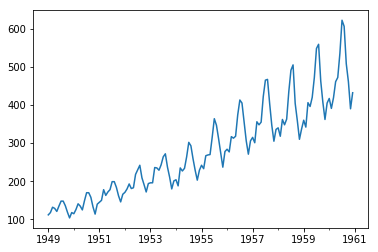

In [115]:
flights.passengers.plot()

# Indexing

In [116]:
np.random.seed(123)
b = pd.Series(np.round(np.random.uniform(0,1,10),2))
c = b.copy()
c.index = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]
b.index = np.random.permutation(np.r_[0:10])

In [117]:
c

a    0.70
b    0.29
c    0.23
d    0.55
e    0.72
f    0.42
g    0.98
h    0.68
i    0.48
j    0.39
dtype: float64

In [118]:
b

2    0.70
1    0.29
8    0.23
7    0.55
9    0.72
4    0.42
5    0.98
6    0.68
3    0.48
0    0.39
dtype: float64

>> ## **NEVER APPLY [] DIRECTLY ON SERIES**

In [119]:
b[0:1] #element at index 0 (or position 0)

2    0.7
dtype: float64

In [121]:
b[0] #element at label 0

0.39

In [122]:
b[[0]]

0    0.39
dtype: float64

In [123]:
# b.iloc[] - position-based (physical index-based)
# b.loc[] -- label-vector-based (b.index-based)

In [124]:
b.iloc[0]

0.7

In [125]:
b.iloc[0:1]

2    0.7
dtype: float64

In [126]:
b.loc[0]

0.39

In [127]:
b.loc[[0]]

0    0.39
dtype: float64

In [128]:
b.loc[1:7]

1    0.29
8    0.23
7    0.55
dtype: float64

In [130]:
tips.loc[:, 'tip':'day'].head()

    tip     sex smoker  day
0  1.01  Female     No  Sun
1  1.66    Male     No  Sun
2  3.50    Male     No  Sun
3  3.31    Male     No  Sun
4  3.61  Female     No  Sun

In [131]:
c.loc['c':'f']

c    0.23
d    0.55
e    0.72
f    0.42
dtype: float64

In [132]:
c.loc[c>0.7]

e    0.72
g    0.98
dtype: float64

In [134]:
c.iloc[c>0.7]  #boolean based indxing doesn't work for iloc, only for loc

ValueError: iLocation based boolean indexing cannot use an indexable as a mask

In [135]:
tips.iloc[:5,:].loc[:,['sex','day']]

      sex  day
0  Female  Sun
1    Male  Sun
2    Male  Sun
3    Male  Sun
4  Female  Sun

In [137]:
tips.loc[tips['tip']>8,:]

     total_bill   tip   sex smoker  day    time  size
170       50.81  10.0  Male    Yes  Sat  Dinner     3
212       48.33   9.0  Male     No  Sat  Dinner     4

In [138]:
x= tips.groupby(['sex', 'day']).mean()

In [139]:
x

             total_bill       tip      size
sex    day                                 
Female Fri    14.145556  2.781111  2.111111
       Sat    19.680357  2.801786  2.250000
       Sun    19.872222  3.367222  2.944444
       Thur   16.715312  2.575625  2.468750
Male   Fri    19.857000  2.693000  2.100000
       Sat    20.802542  3.083898  2.644068
       Sun    21.887241  3.220345  2.810345
       Thur   18.714667  2.980333  2.433333

In [140]:
x.loc['Male', :]

      total_bill       tip      size
day                                 
Fri    19.857000  2.693000  2.100000
Sat    20.802542  3.083898  2.644068
Sun    21.887241  3.220345  2.810345
Thur   18.714667  2.980333  2.433333

In [142]:
x.loc[(slice(None), ['Fri','Sat']),:]  #slicing when you have multiple indices,i.e. when you group by more than one attribute

            total_bill       tip      size
sex    day                                
Female Fri   14.145556  2.781111  2.111111
       Sat   19.680357  2.801786  2.250000
Male   Fri   19.857000  2.693000  2.100000
       Sat   20.802542  3.083898  2.644068

In [143]:
#1. Get data on male customers only
#2.  choose male customers with total_bill in $[10,20] 
# 3. choose Sat and Sun with tip > $5
# 4. partition(split) tips: create 2 df: tips_train (80%) and tips_test (20% rows)

In [187]:
#1
tips.loc[tips.sex=='Male',:]

     total_bill   tip   sex smoker   day    time  size
1         10.34  1.66  Male     No   Sun  Dinner     3
2         21.01  3.50  Male     No   Sun  Dinner     3
3         23.68  3.31  Male     No   Sun  Dinner     2
5         25.29  4.71  Male     No   Sun  Dinner     4
6          8.77  2.00  Male     No   Sun  Dinner     2
7         26.88  3.12  Male     No   Sun  Dinner     4
8         15.04  1.96  Male     No   Sun  Dinner     2
9         14.78  3.23  Male     No   Sun  Dinner     2
10        10.27  1.71  Male     No   Sun  Dinner     2
12        15.42  1.57  Male     No   Sun  Dinner     2
13        18.43  3.00  Male     No   Sun  Dinner     4
15        21.58  3.92  Male     No   Sun  Dinner     2
17        16.29  3.71  Male     No   Sun  Dinner     3
19        20.65  3.35  Male     No   Sat  Dinner     3
20        17.92  4.08  Male     No   Sat  Dinner     2
23        39.42  7.58  Male     No   Sat  Dinner     4
24        19.82  3.18  Male     No   Sat  Dinner     2
25        

In [165]:
#2
tips.loc[(tips.total_bill >=10)&((tips.total_bill <=20) & (tips.sex =='Male')),:]

tips.loc[(tips.sex =='Male') & (tips.total_bill.between(10,20)),:]


tips.query('sex =="Male" and 10 <= total_bill <= 20')

     total_bill   tip   sex smoker   day    time  size
1         10.34  1.66  Male     No   Sun  Dinner     3
8         15.04  1.96  Male     No   Sun  Dinner     2
9         14.78  3.23  Male     No   Sun  Dinner     2
10        10.27  1.71  Male     No   Sun  Dinner     2
12        15.42  1.57  Male     No   Sun  Dinner     2
13        18.43  3.00  Male     No   Sun  Dinner     4
17        16.29  3.71  Male     No   Sun  Dinner     3
20        17.92  4.08  Male     No   Sat  Dinner     2
24        19.82  3.18  Male     No   Sat  Dinner     2
25        17.81  2.34  Male     No   Sat  Dinner     4
26        13.37  2.00  Male     No   Sat  Dinner     2
27        12.69  2.00  Male     No   Sat  Dinner     2
31        18.35  2.50  Male     No   Sat  Dinner     4
34        17.78  3.27  Male     No   Sat  Dinner     2
36        16.31  2.00  Male     No   Sat  Dinner     3
38        18.69  2.31  Male     No   Sat  Dinner     3
40        16.04  2.24  Male     No   Sat  Dinner     3
41        

In [166]:
# 3. choose Sat and Sun with tip > $5
tips.loc[(tips.tip >5)&((tips.day =='Sat') | (tips.day =='Sun')), :]


tips.loc[(tips.tip >5) & (tips.day.isin(['Sat','Sun'])),:]

tips.query("tip > 5 and day in ['Sat','Sun']")

     total_bill    tip     sex smoker  day    time  size
23        39.42   7.58    Male     No  Sat  Dinner     4
44        30.40   5.60    Male     No  Sun  Dinner     4
47        32.40   6.00    Male     No  Sun  Dinner     4
52        34.81   5.20  Female     No  Sun  Dinner     4
59        48.27   6.73    Male     No  Sat  Dinner     4
116       29.93   5.07    Male     No  Sun  Dinner     4
155       29.85   5.14  Female     No  Sun  Dinner     5
170       50.81  10.00    Male    Yes  Sat  Dinner     3
172        7.25   5.15    Male    Yes  Sun  Dinner     2
181       23.33   5.65    Male    Yes  Sun  Dinner     2
183       23.17   6.50    Male    Yes  Sun  Dinner     4
211       25.89   5.16    Male    Yes  Sat  Dinner     4
212       48.33   9.00    Male     No  Sat  Dinner     4
214       28.17   6.50  Female    Yes  Sat  Dinner     3
239       29.03   5.92    Male     No  Sat  Dinner     3

In [167]:
len(tips)

244

In [183]:
# 4. partition(split) tips: create 2 df: tips_train (80%) and tips_test (20% rows)
idx = np.random.permutation(np.arange(tips.shape[0]))
list1=idx[:int(tips.shape[0]*.8)]
list2=idx[int(tips.shape[0]*.8):]

tips_train=tips.iloc[list1, :]

tips_train = tips.iloc[: int(len(tips)*0.8), : ]

In [184]:
tips_test=tips.iloc[int(len(tips)*0.8) : , : ]

In [172]:
tips_train.head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [176]:
int(len(tips)*0.8)

195

In [185]:
tips_train.head()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [186]:
tips_test.head()

     total_bill   tip     sex smoker   day   time  size
195        7.56  1.44    Male     No  Thur  Lunch     2
196       10.34  2.00    Male    Yes  Thur  Lunch     2
197       43.11  5.00  Female    Yes  Thur  Lunch     4
198       13.00  2.00  Female    Yes  Thur  Lunch     2
199       13.51  2.00    Male    Yes  Thur  Lunch     2

In [ ]:
np.random.shuffle(tips.values)
tips_train = tips[(tips.index<np.percentile(tips.index, 80))]
tips_test = tips[(tips.index>=np.percentile(tips.index, 80)) ]